#  An Analysis of the Impact of Household Size on Carbon Footprints
## Project One

## 1.1 Introduction

Given the current climate emergency that has been afflicting the planet there has been a growing interest in using data to identify the most effective solutions to mitigate the effects of the changing temperatures. This current paper will be a part of a series of papers exploring the issue, specifically in the realm of city planning and how good urbanization may lead to lower carbon emissions without necessarily requiring the degrowth policies many politicians fear espousing. 

In this paper, I will analyze data recovered from the Global Carbon Project, to determine the general distribution of carbon emissions across countries, across time periods and the correlation each of them have with total emissions. Then in the second part of the project, I recovered data from the United Nations Department of Economic and Social Affairs that recorded household size data for a number of different countries at different times.

## Set Up

In this projet, we will examine first: the relationship between the six carbon emission sources (coal, oil, gas, cement, flaring, other) and the total, then between the six and Per Capita emissions. This will be the basis for further research pertaining to the impact of household size on carbon footprints

I am choosing to analyze all the variables in the dataset, which in this case are the six explanatory variables (Coal, Oil, Gas, Cement, Flaring and Other), as well as the year which is an independent variable, in order to examine the two dependent variables (Total and Per Capita emissions).

I have decided to choose the six emission sources since through them we can get a better understanding of the composition of the emissions, which can be used to provide more useful results by the end of the study. If cement is main source of emissions in countries with a high emissions per capita, wealthier governments should perhaps switch their priorities from focusing on energy sources to switching the material used in construction.

Inutitively all the emission sources should have a positive effect on total emissions, as total emissions is equal to the sum of the other emissions, however we will explore whether an increase in the emissions of one source actually decreases the emissions of other sources to the extent where the variable has a null or negative effect on total transmissions. 

After processing the data, one can conclude that the year, despite not being explanatory, tends to have a positive correlation with total and per capita emissions due to the economic development that most countries have gone through in the 271 year period the data covers.

Once a breakdown of the carbon emissions data is created we can differentiate between the different carbon emission sources (how each of them affects the total) and can move onto how household size changes the emissions and emission sources.

# 1.2 Data Cleaning

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from pandas.plotting import scatter_matrix
from scipy.stats import linregress
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline
import qeds
import warnings
import requests
from bs4 import BeautifulSoup
from sklearn import linear_model
!pip install country_converter --upgrade
import country_converter as coco
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sn

## Importing the Data

In [2]:
emissions_data=pd.read_csv('Emissions.csv')


In [3]:
emissions_data

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


## Data Cleaning
#### Here we are switching NaN values to zero to make them easier to manipulate and then we're eliminating all rows where the total emissions is 0, to ensure the data is not skewed leftwards.

In [4]:
emissions_data.fillna(0, inplace=True)
emissions_data_clean = emissions_data[emissions_data['Total'] != 0]
emissions_data_clean

emissions_data_clean.loc[emissions_data_clean['Country']=='USA']

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
59890,USA,USA,1800,0.252816,0.252816,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
59891,USA,USA,1801,0.267472,0.267472,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
59892,USA,USA,1802,0.289456,0.289456,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
59893,USA,USA,1803,0.296784,0.296784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
59894,USA,USA,1804,0.333424,0.333424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
60107,USA,USA,2017,5210.957584,1308.479533,2314.675386,1460.391796,40.323535,59.245489,27.841845,15.800777
60108,USA,USA,2018,5376.657233,1256.201494,2365.283480,1618.720337,38.970745,72.786925,24.694251,16.187923
60109,USA,USA,2019,5259.143836,1070.723931,2358.831137,1673.999100,40.895869,88.383147,26.310652,15.730884
60110,USA,USA,2020,4715.691109,878.972885,2049.336500,1653.677852,40.687747,67.684371,25.331754,14.037218


## Data Cleaning for Part 2

In [5]:
household_data=pd.read_csv('Worldwide household size.csv', header = 1)
household_data=household_data.drop(household_data[household_data["Average household size (number of members)"] == '..'].index)
household_data=household_data.drop(household_data.columns[43:], axis=1)
household_data=household_data.drop(household_data.columns[1:3], axis=1)

In [6]:
household_data

,Country or area,Reference date (dd/mm/yyyy),Average household size (number of members),1 member,2-3 members,4-5 members,6 or more members,Female head of household (percentage of households),Under 20 years (aged 0-19),Aged 20-64 years,...,Single parent with children,Single mother with children,Single father with children,Extended family,Non-relatives,Unknown,Nuclear,Multi-generation,Three generation,Skip generation
0,Afghanistan,2010-01-07,7.75,0.15,7.41,18.59,73.85,0.86,1.18,89.13,...,0.77,0.5,0.27,42.05,0.16,0.04,57.59,47.71,27.28,0.04
1,Afghanistan,19/10/2015,8.04,0.19,6.45,16.84,76.52,1.67,0.63,88.46,...,0.99,0.78,0.21,46.86,0.19,0.0,52.77,50.39,32.18,0.07
2,Albania,2000-01-07,4.35,4.42,25.59,47.28,22.71,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,Albania,2005-01-07,4.00,5.04,32.37,45.37,17.22,11.92,0.01,78.14,...,4.86,4.05,0.82,24.7,0.13,0.0,70.13,45.96,8.6,0.0
4,Albania,21/01/2009,3.82,6.15,38.23,39.97,15.65,15.6,0.06,73.01,...,6.7,5.92,0.78,27.86,0.32,0.0,65.67,45.9,23.07,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,Zimbabwe,21/12/2010,4.15,11.66,30.94,33.62,23.77,44.57,1.78,86.29,...,12.22,10.61,1.61,43.25,4.01,0.01,41.07,21.56,17.3,7.38
1055,Zimbabwe,2012-01-07,4.04,13.13,30.8,31.26,24.8,33.32,2.75,81.05,...,10.42,8.96,1.47,42.56,6.25,0.44,37.62,18.09,12.46,6.33
1056,Zimbabwe,2014-01-07,4.16,11.03,30.82,34.38,23.77,38.23,1.8,84.3,...,12.41,11.24,1.17,40.99,4.73,0.10,43.14,19.87,16.66,9.04
1057,Zimbabwe,27/09/2015,4.08,12.37,31.14,33.76,22.72,40.55,1.94,84.29,...,12.28,11.04,1.25,39.94,5.2,0.03,42.46,19.51,15.58,8.21


#### What follows below is done to format the date such that it will be according to the year and will be easier to merge with the carbon emissions dataset

In [ ]:
date_formats = ['%Y-%m-%d', '%Y/%m/%d', '%d-%m-%Y', '%d/%m/%Y']
household_data['Reference date (dd/mm/yyyy)'] = pd.to_datetime(household_data['Reference date (dd/mm/yyyy)'], 
                                                               errors='coerce', infer_datetime_format=True)

In [8]:
household_data['Reference date (dd/mm/yyyy)'] = pd.to_datetime(household_data['Reference date (dd/mm/yyyy)'], 
                                                               format='%Y-%m-%d')
household_data['Year'] = household_data['Reference date (dd/mm/yyyy)'].dt.year
household_data

,Country or area,Reference date (dd/mm/yyyy),Average household size (number of members),1 member,2-3 members,4-5 members,6 or more members,Female head of household (percentage of households),Under 20 years (aged 0-19),Aged 20-64 years,...,Single mother with children,Single father with children,Extended family,Non-relatives,Unknown,Nuclear,Multi-generation,Three generation,Skip generation,Year
0,Afghanistan,2010-01-07,7.75,0.15,7.41,18.59,73.85,0.86,1.18,89.13,...,0.5,0.27,42.05,0.16,0.04,57.59,47.71,27.28,0.04,2010
1,Afghanistan,2015-10-19,8.04,0.19,6.45,16.84,76.52,1.67,0.63,88.46,...,0.78,0.21,46.86,0.19,0.0,52.77,50.39,32.18,0.07,2015
2,Albania,2000-01-07,4.35,4.42,25.59,47.28,22.71,..,..,..,...,..,..,..,..,..,..,..,..,..,2000
3,Albania,2005-01-07,4.00,5.04,32.37,45.37,17.22,11.92,0.01,78.14,...,4.05,0.82,24.7,0.13,0.0,70.13,45.96,8.6,0.0,2005
4,Albania,2009-01-21,3.82,6.15,38.23,39.97,15.65,15.6,0.06,73.01,...,5.92,0.78,27.86,0.32,0.0,65.67,45.9,23.07,0.38,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,Zimbabwe,2010-12-21,4.15,11.66,30.94,33.62,23.77,44.57,1.78,86.29,...,10.61,1.61,43.25,4.01,0.01,41.07,21.56,17.3,7.38,2010
1055,Zimbabwe,2012-01-07,4.04,13.13,30.8,31.26,24.8,33.32,2.75,81.05,...,8.96,1.47,42.56,6.25,0.44,37.62,18.09,12.46,6.33,2012
1056,Zimbabwe,2014-01-07,4.16,11.03,30.82,34.38,23.77,38.23,1.8,84.3,...,11.24,1.17,40.99,4.73,0.10,43.14,19.87,16.66,9.04,2014
1057,Zimbabwe,2015-09-27,4.08,12.37,31.14,33.76,22.72,40.55,1.94,84.29,...,11.04,1.25,39.94,5.2,0.03,42.46,19.51,15.58,8.21,2015


In [9]:
column_names = list(household_data.columns)
column_names.insert(1, column_names.pop(41))
household_data = household_data.reindex(columns=column_names)
household_data.rename(columns={'Country or area': 'Country'}, inplace=True)
household_data = household_data.set_index("Country")
household_data.rename(index={'United States of America': 'USA'}, inplace=True)
household_data
household_data = household_data.drop(household_data.columns[3:], axis=1)
household_data

,Year,Reference date (dd/mm/yyyy),Average household size (number of members)
Country,,,
Afghanistan,2010,2010-01-07,7.75
Afghanistan,2015,2015-10-19,8.04
Albania,2000,2000-01-07,4.35
Albania,2005,2005-01-07,4.00
Albania,2009,2009-01-21,3.82
...,...,...,...
Zimbabwe,2010,2010-12-21,4.15
Zimbabwe,2012,2012-01-07,4.04
Zimbabwe,2014,2014-01-07,4.16


### Merging Dataframes

In [10]:
merged_df = pd.merge(emissions_data_clean, household_data, on=['Country', 'Year'])
merged_df = merged_df.drop(merged_df.columns[13:], axis=1)
merged_df = merged_df.set_index("Country")
merged_df

,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Reference date (dd/mm/yyyy),Average household size (number of members)
Country,,,,,,,,,,,,
Afghanistan,AFG,2010,8.364803,2.246032,5.833088,0.271136,0.014547,0.0,0.0,0.296733,2010-01-07,7.75
Afghanistan,AFG,2015,9.791093,2.843264,6.624512,0.282128,0.041189,0.0,0.0,0.290076,2015-10-19,8.04
Albania,ALB,2000,3.024926,0.069531,2.839801,0.021957,0.093637,0.0,0.0,0.950630,2000-01-07,4.35
Albania,ALB,2005,4.261413,0.073216,3.909740,0.021965,0.256492,0.0,0.0,1.405185,2005-01-07,4.00
Albania,ALB,2009,4.406552,0.388384,3.414848,0.018320,0.585000,0.0,0.0,1.503665,2009-01-21,3.82
...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,ZWE,2010,8.754012,6.507264,1.938256,0.000000,0.308492,0.0,0.0,0.681789,2010-12-21,4.15
Zimbabwe,ZWE,2012,11.253769,6.994576,3.693312,0.000000,0.565881,0.0,0.0,0.848359,2012-01-07,4.04
Zimbabwe,ZWE,2014,11.946148,7.732336,3.717821,0.000000,0.495991,0.0,0.0,0.862180,2014-01-07,4.16


## 1.3 Finding the Summary Statistics

In [11]:
summary_stats = emissions_data_clean[["Total", "Coal", "Oil", "Gas", "Cement", "Flaring", "Other", 
                                      "Per Capita"]].describe(percentiles=[0.2, 0.4, 0.6, 0.8]) 
summary_stats

,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,21697.000000,21697.000000,21697.000000,21697.000000,21697.000000,21697.000000,21697.000000,21697.000000
mean,160.107852,74.129147,55.812023,23.418705,4.154208,1.701091,0.817682,3.859481
std,1398.498004,599.625528,519.270976,247.227495,49.278876,16.670896,11.044686,16.367617
min,0.000032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20%,0.252816,0.000000,0.040304,0.000000,0.000000,0.000000,0.000000,0.000000
40%,1.677927,0.032939,0.474898,0.000000,0.000000,0.000000,0.000000,0.363348
50%,3.605832,0.275102,1.047904,0.000000,0.010903,0.000000,0.000000,0.829750
60%,7.746593,1.132176,2.275344,0.000000,0.101610,0.000000,0.000000,1.686489
80%,43.744429,12.133374,14.274211,1.919097,0.869871,0.000000,0.000000,5.682274
max,37123.850352,15051.512770,12345.653374,7921.829472,1672.592372,439.253991,306.638573,834.192642


The chart above indicates the prevalence of different co2 emissions with coal being the highest emitter among all sources, followed by oil, gas, cement, other and flaring. This we can determine by looking at the *mean* column; given all sources are represented the same amount of times, the mean can be used to rank the different source emissions by contribution to total emissions, across time.

The standard deviation for every variable is also several orders of magnitude larger than the means per variable, this means that there has been significant variation in the emission numbers and it would therefore be difficult to fit the emissions accurately to a linear regression.

In addition, if we compare the means of the different variables to their values at the different percentiles, we can see that in almost every case (save Per Capita emissions) the 80th percentile is still lower than the mean. This means that relatively few data points are responsible for affecting the total amount of emissions of every variable (including total emissions). In other words, this means there's a big inequality in the emissions from every source and if we look at the graph below we'll be able to see that it's due to an exponential increase in emissions (from every source) in the past century$^{2}$
.



## 1.4 Charts
### $^{2}$ Graphs displaying exponential increase in emissions from different sources, in total and per capita


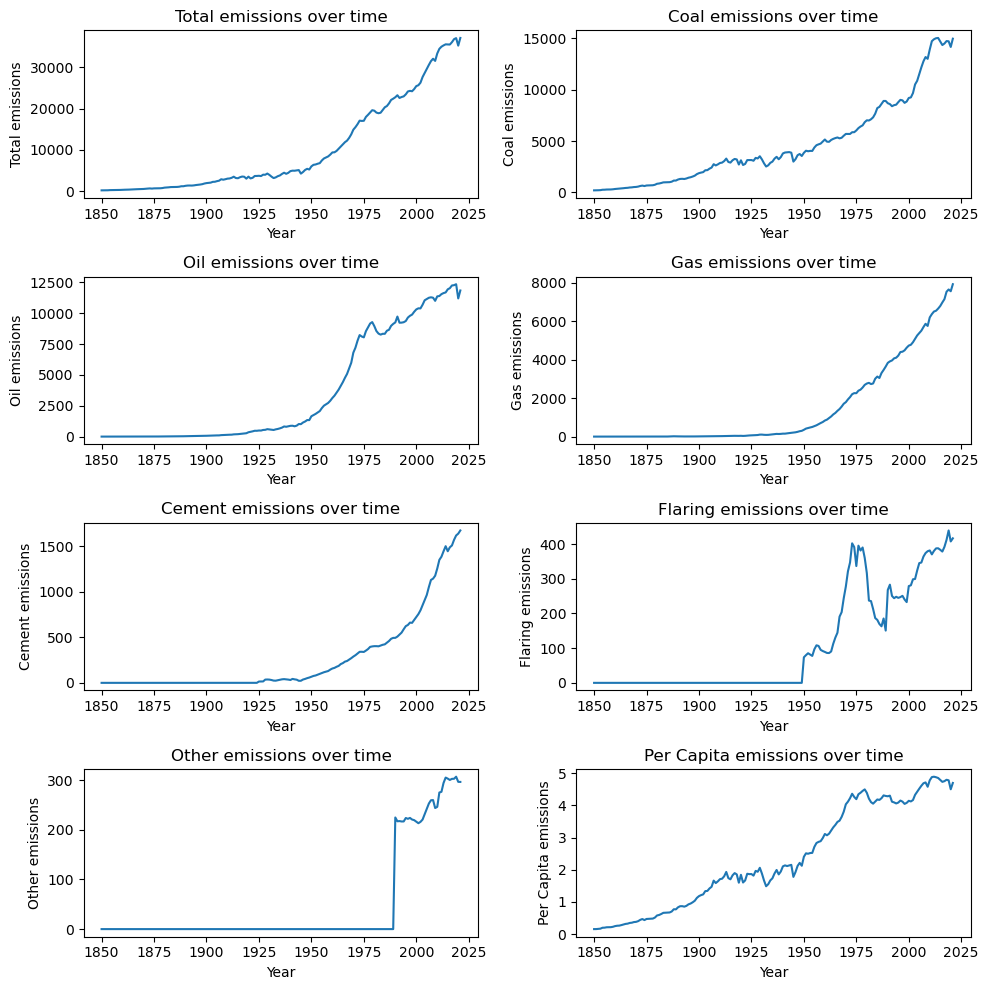

In [12]:
emissions_data_Global = emissions_data_clean[emissions_data_clean["Country"]== "Global"]
emissions_data_Global = emissions_data_Global[emissions_data_Global['Year'] >= 1850]

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))
axs = axs.flatten()

for i in range(len(emissions_data.columns)):
    if i > 2:
        axs[i-3].plot(emissions_data_Global['Year'], emissions_data_Global[emissions_data.columns[i]])
        axs[i-3].set_xlabel('Year')
        axs[i-3].set_ylabel(emissions_data.columns[i] + " emissions")
        axs[i-3].set_title(emissions_data.columns[i] + " emissions over time")
fig.tight_layout()
plt.show()


The graphs above are used to display the almost exponential increase in carbon emissions from all sources beginnning in the 20th century. It is also interesting to note the recent stablization of some sources recently, namely from coal and from coal. The per capita chart has also been added in order to illustrate how despite generally total emissions have increased over time, per capita emissions have stabilized and can serve to show how much of the growth in total emissions is not a function of higher more emission inducing consumption but rather sheer population growth.

There are two notable changes in emissions data: a sudden increase in flaring emissions around 1950, and a rise in emissions from renewable energy sources around 1985. The increase in flaring emissions can be attributed to the fact that flaring became popularized in the mid-20th century, and until 1950 no country had begun to measure emissions from this source. On the other hand, the rise in emissions from other energy sources can be attributed to the growing awareness of carbon emissions from fossil fuels, which led to the increasing popularity of renewable energy sources in the late 20th century. This rise in emissions could come from both the production of the requisite technology, such as photovoltaic cells or wind turbines, and from the production of energy itself, as is the case with biomass.

## Further Charts

The chart below helps to identify the nations that are most responsible for emissions. To create the graph, we first grouped together the G7 nations since they represent the most developed democracies, who are also known for their heavy per capita energy use. We also included the often neglected emissions from international transport, which were surprisingly large and included in the dataset. Finally, we included China as a reference point to highlight their significant impact on total emissions, despite emitting relatively little until the 1950s.

In [13]:
emissions_sorted = emissions_data_clean.groupby("Country").sum().sort_values("Total", ascending=False)

In [14]:
emissions_g7 = emissions_sorted.loc[['USA', 'United Kingdom', 'Japan', 'Italy', 'France', 'Germany', 'Canada']]
emissions_g7.head()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
Country,,,,,,,,,
USA,424131,421906.855203,175444.989793,161275.027109,78542.543572,2795.830555,2421.252825,1427.211353,2252.097216
United Kingdom,512856,78508.720102,56850.597464,13545.630168,7183.232055,523.546615,290.454679,115.259114,1645.530351
Japan,299453,66711.083302,24175.925122,33153.129977,7061.825160,2005.370235,15.542080,299.290721,586.279588
Italy,314361,25065.176247,4734.375652,13635.770741,5507.858792,949.116333,95.915814,142.138925,457.104125
France,409692,39105.764962,19078.952503,15350.881978,3663.174996,699.426246,171.551305,141.777938,796.097352


In [15]:
International_transport = emissions_sorted.loc[['International Transport']]
International_transport.head()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
Country,,,,,,,,,
International Transport,142956,43062.671846,0.0,43062.671846,0.0,0.0,0.0,0.0,0.0


In [16]:
China_emissions = emissions_sorted.loc[['China']]
China_emissions.head()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
Country,,,,,,,,,
China,225860,249352.81766,187073.411887,34491.543227,7162.011417,15657.812105,68.487541,4899.55149,202.362414


In [17]:
Rest_emissions = emissions_sorted.loc[['Global']]
transport_share = International_transport['Total'].sum()/ Rest_emissions['Total']
print(transport_share)



Country
Global    0.024792
Name: Total, dtype: float64


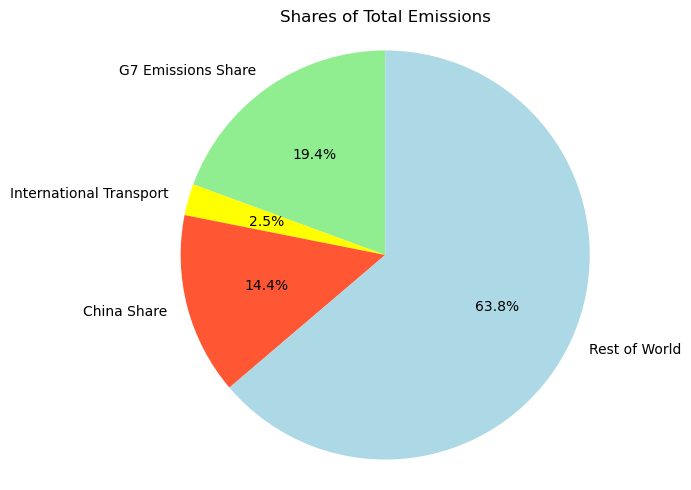

In [18]:
share_of_g7 = emissions_g7.iloc[1:10]['Total'].sum() / Rest_emissions['Total']
transport_share = International_transport['Total'].sum() / Rest_emissions['Total']
china_share = China_emissions['Total'].sum() / Rest_emissions['Total']

labels = ['G7 Emissions Share', 'International Transport', "China Share", 'Rest of World']
sizes = [share_of_g7, transport_share, china_share, 1 - share_of_g7 - transport_share - china_share]
colors = ['#90EE90', '#FFFF00', '#FF5733', '#ADD8E6']

fig1, ax1 = plt.subplots()
ax1.pie(np.array(sizes).flatten(), colors=colors, labels=labels, startangle=90, frame=True, autopct='%1.1f%%')
fig = plt.gcf()
ax1.axis('equal')
ax1.axis('off')
plt.tight_layout()
plt.title("Shares of Total Emissions")
plt.show()

The chart below, helps us to visualize the changing sources of total emissions. For about 200 years, we can see that coal was the main source of emissions and by a large margin, but from around 1970 to 2000 there was a boom in oil emissions, most likely related to political events and the growing awareness of coal's consequences. However, once the 2000's hit we can again see a jump in coal emissions as a percentage of the total emissions. What nations were behind this increase in coal emissions?

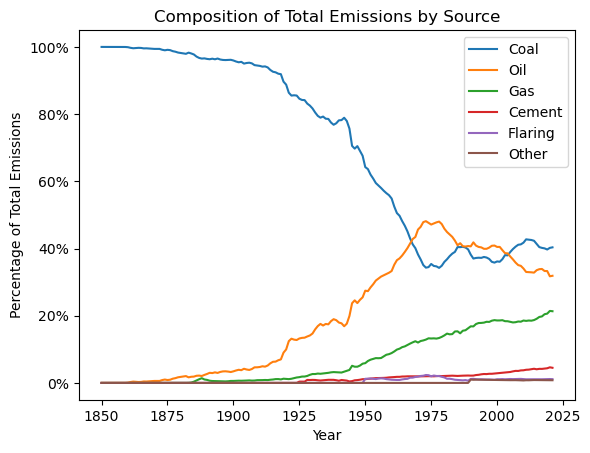

In [19]:
emissions_filtered = emissions_data_Global[['Total','Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']]

emissions_filtered = emissions_filtered.iloc[:, 1:].div(emissions_filtered.Total, axis=0) * 100

emissions_filtered = emissions_filtered.assign(Year=emissions_data_Global['Year'])

emissions_filtered.plot(x='Year', y=['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other'], kind='line')

plt.title("Composition of Total Emissions by Source")

plt.ylabel("Percentage of Total Emissions")

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()


In the tables below we are seeking to explain who are the main culprits behind coal's resurgence. We find the countries that had the largest absolute increase in coal emissions and then display them on a line graph to help illustrate the trends since 2000 and also show the differences in total emission amounts. 

In [20]:
emissions_2000 = emissions_data_clean.loc[(emissions_data_clean['Year'] == 2000), ['Country', 'Coal']]
emissions_2021 = emissions_data_clean.loc[(emissions_data_clean['Year'] == 2021), ['Country', 'Coal']]

emissions_2000_2021 = pd.merge(emissions_2000, emissions_2021, on='Country', suffixes=('_2000', '_2021'))
emissions_2000_2021

,Country,Coal_2000,Coal_2021
0,Afghanistan,0.003664,4.203536
1,Albania,0.069531,0.174413
2,Algeria,1.960240,1.095536
3,Andorra,0.000000,0.000000
4,Angola,0.000000,0.000000
...,...,...,...
214,Yemen,0.000000,0.245909
215,Zambia,0.289456,2.463629
216,Zimbabwe,10.123632,7.225620
217,International Transport,0.000000,0.000000


In [21]:
emissions_2000 = emissions_data_clean[emissions_data_clean['Year'] == 2000]
emissions_2021 = emissions_data_clean[emissions_data_clean['Year'] == 2021]
emissions_2000_2021 = pd.merge(emissions_2000, emissions_2021, on='Country', suffixes=('_2000', '_2021'))
emissions_2000_2021 = emissions_2000_2021[['Country', 'Coal_2000', 'Coal_2021']]

emissions_2000_2021['Absolute change 2000-2021'] = emissions_2000_2021['Coal_2021'] - emissions_2000_2021['Coal_2000']
emissions_2000_2021['% change 2000-2021'] = emissions_2000_2021['Absolute change 2000-2021'] / emissions_2000_2021['Coal_2000'] * 100

emissions_diff = emissions_2000_2021[['Country', 'Absolute change 2000-2021', '% change 2000-2021']]

mask = emissions_diff['Absolute change 2000-2021'] > 0
emissions_filtered = emissions_diff[mask]
emissions_filtered = emissions_filtered.sort_values(by='Absolute change 2000-2021', ascending=False)
top_30 = emissions_filtered[1:].head(30)
top_30





,Country,Absolute change 2000-2021,% change 2000-2021
38,China,5354.248635,2.057952e+02
88,India,1229.435087,2.146072e+02
89,Indonesia,252.247563,4.955163e+02
212,Viet Nam,175.802112,8.486191e+02
157,South Korea,120.025217,7.323830e+01
98,Kazakhstan,90.319678,9.980208e+01
116,Malaysia,77.921062,9.896365e+02
198,Turkey,64.022121,6.497055e+01
151,Philippines,58.610285,3.595292e+02
145,Pakistan,51.767502,6.321559e+02


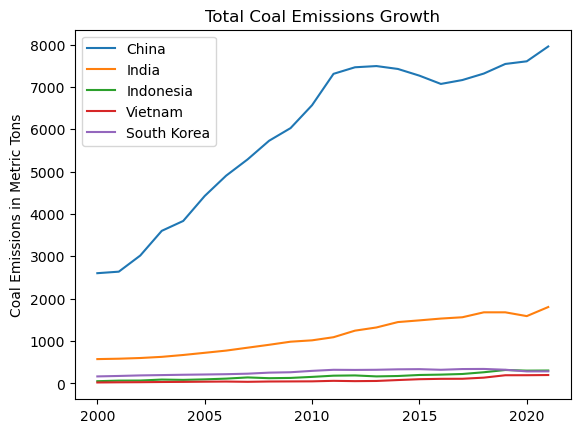

In [22]:
emissions_data_Clean = emissions_data_clean[(emissions_data_clean['Year'] >= 2000) & (emissions_data_clean['Year'] <= 2021)]
emissions_data_Clean = emissions_data_Clean.reset_index()

emissions_china =  emissions_data_Clean[emissions_data_Clean["Country"]== "China"]
emissions_china_coal = emissions_china[["Coal", "Year"]]

emissions_india =  emissions_data_Clean[emissions_data_Clean["Country"]== "India"]
emissions_india_coal = emissions_india[["Coal", "Year"]]

emissions_indo =  emissions_data_Clean[emissions_data_Clean["Country"]== "Indonesia"]
emissions_indo_coal = emissions_indo[["Coal", "Year"]]

emissions_viet =  emissions_data_Clean[emissions_data_Clean["Country"]== "Viet Nam"]
emissions_viet_coal = emissions_viet[["Coal", "Year"]]

emissions_southk =  emissions_data_Clean[emissions_data_Clean["Country"]== "South Korea"] 
emissions_southk_coal = emissions_southk[["Coal", "Year"]] 

plt.plot(emissions_china_coal["Year"], emissions_china_coal["Coal"], label="China")
plt.plot(emissions_india_coal["Year"], emissions_india_coal["Coal"], label="India")
plt.plot(emissions_indo_coal["Year"], emissions_indo_coal["Coal"], label="Indonesia")
plt.plot(emissions_viet_coal["Year"], emissions_viet_coal["Coal"], label="Vietnam")
plt.plot(emissions_southk_coal["Year"], emissions_southk_coal["Coal"], label="South Korea")

plt.title("Total Coal Emissions Growth")
plt.ylabel("Coal Emissions in Metric Tons")
plt.legend()
plt.show()

China is the biggest culprit behind the coal increases in the past 20 years. In fact, according to the Center for Research on Energy and Clean Air, China is building six times more coal plants than the rest of the world combined ((Myllyvirta et al., China permits two new coal power plants per week in 2022 2023 https://energyandcleanair.org/publication/china-permits-two-new-coal-power-plants-per-week-in-2022/)). Despite this, China is still decreasing the proportion of its energy mix which is accounted for by coal emissions (U.S. Energy Information Administration - EIA - independent statistics and analysis 2022 https://www.eia.gov/international/analysis/country/CHN). 

One of the challenges facing China and other countries on the list (with the exception of South Korea) is that as they develop and their economies grow, their energy consumption also increases. Coal has traditionally been a cheap and abundant source of energy, and many countries have turned to it to meet their growing energy needs. Despite its negative impact on the environment and human health, coal has been viewed as a reliable and secure source of energy by some countries, leading to its continued use even as renewable energy alternatives become more available.

# Project Two

## 2.1 Message
The primary objective of this project component is to integrate household size statistics to investigate the correlation between this variable and the previously analyzed carbon emissions. The initial step will involve measuring the relationship between household size and total emissions, followed by examining the correlation between household size in each country and the emissions it produces the most. Finally, countries will be categorized based on specific characteristics to evaluate whether economic conditions and per capita emissions contribute to varying effects of household size on emissions.

In [23]:
merged_df['Average household size (number of members)'] = pd.to_numeric(
    merged_df['Average household size (number of members)'], errors='coerce')
merged_df['Per Capita'] = pd.to_numeric(merged_df['Per Capita'], errors='coerce')


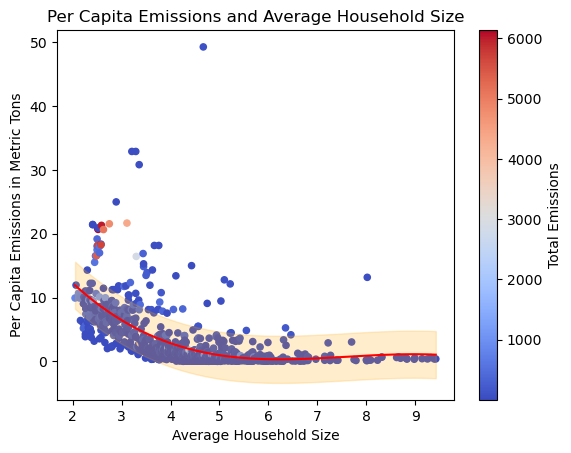

In [24]:
merged_df = merged_df.sort_values('Average household size (number of members)')
merged_df = merged_df.rename(columns={'Total':"Total Emissions"})
merged_df.plot.scatter(x = 'Average household size (number of members)', y = 'Per Capita', c = 'Total Emissions', cmap = 'coolwarm')
x = merged_df['Average household size (number of members)'].values
y = merged_df['Per Capita'].values


# add polynomial fit and error band
p = np.polyfit(x, y, 3)
f = np.poly1d(p)
y_pred = np.polyval(p, x)
residuals = y - y_pred
std_error = np.std(residuals)
plt.plot(x, f(x), 'r')
plt.fill_between(x, y_pred-std_error, y_pred+std_error, alpha=0.2, color='orange')

# set labels and title
plt.xlabel('Average Household Size')
plt.ylabel('Per Capita Emissions in Metric Tons')
plt.title('Per Capita Emissions and Average Household Size')

plt.show()


The code above displays the relationship between the average household size, emissions per capita and total emissions. The first thing to note is the uniformity in the colour of the dots. This means that most datapoints have emissions that are relatively low to what the maximum is. This once again reinforces the idea that there is a significant carbon emissions inequality that has been widening throughout the centuries and between countries. In addition, we can see that when household sizes are between 2 and 4 there's an important relationship between the size and per capita carbon emission. This is reinforced by the fact that the per capita emissions stabilizes once household size reaches 4 and is at a point beyond the reach of the standard error. This means that the relationship is most likely significant. Once the household size reaches 4, however, the effect seems to taper off as the line of best fit does not change drastically.

This effect could exist because of actual house size or endogeneity with per capita GDP. For the first possibility, as described in Katherine Kellsworth-Krebs 2019 paper (Ellsworth-Krebs, Katherine. “Implications of declining household sizes and expectations of home comfort for domestic energy demand.” Nature Energy 5 (2019): 20-25.), the apparent relationship household size has with carbon emissions, may be due more to house size than density. Kellsworth-Krebs found that energy efficiency gains from home maintenance have been offset by the trend of increasing house sizes and energy-intensive lifestyles, particularly among single and couple households in suburban areas with rising housing prices. The main driver of this energy intensive lifestyle has been single and couple housing, as due to the rising trend of subarbanization and rising city housing prices, these populations are buyingg bigger and bigger houses relative to what they were buying before.

The second possible reason for this relationship could be that many richer countries tend to, for cultural and economic reasons, have citizens that tend to live in smaller groups. In Kellsworth-Krebs' study she looks at the changing attitudes in the Japanese population whereby in the 1950's 60% of women expected to be taken care of by their children, which most of the time was done through cohabitation, while fourty years later this number was 16%. This means that rich countries tend to emit more, but also tend to have smaller households and so the effect of that wealth has on emissions is being captured here by household size serving as a proxy.

In [25]:
averagehousehold_g7 = merged_df.loc[['USA', 'United Kingdom', 'Japan', 'Italy', 'France', 'Germany']]

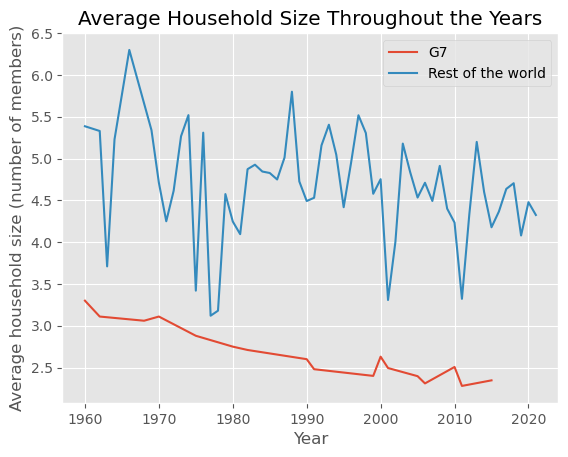

In [85]:
g7_countries = ['USA', 'United Kingdom', 'Japan', 'Italy', 'France', 'Germany']
g7_data = merged_df.loc[g7_countries]

rest_data = merged_df.loc[~merged_df.index.isin(g7_countries)]

g7_mean = g7_data.groupby('Year')['Average household size (number of members)'].mean()
rest_mean = rest_data.groupby('Year')['Average household size (number of members)'].mean()

plt.plot(g7_mean.index, g7_mean, label='G7')
plt.plot(rest_mean.index, rest_mean, label='Rest of the world')

plt.xlabel('Year')
plt.ylabel('Average household size (number of members)')
plt.legend()
plt.title('Average Household Size Throughout the Years')
plt.show()


We can also explore the differences between household sizes between the G7 and the rest of the world. Here we can see, despite some noisy data, that the G7 has consistently had smaller household sizes than the rest of the world, but as we can see below also consistently have higher emissions per capita.

We can also see a spike in CO2 emissions from the rest of the world which can partly be explained by the end of the communist revolution in China and the beginning of rapid industrialization in the country, with a 26% increase in emissions from 1949 to 1950. In addition, 1950 was the first year emissions data was available for many developing countries, which also contributed to a small peak at 1950.

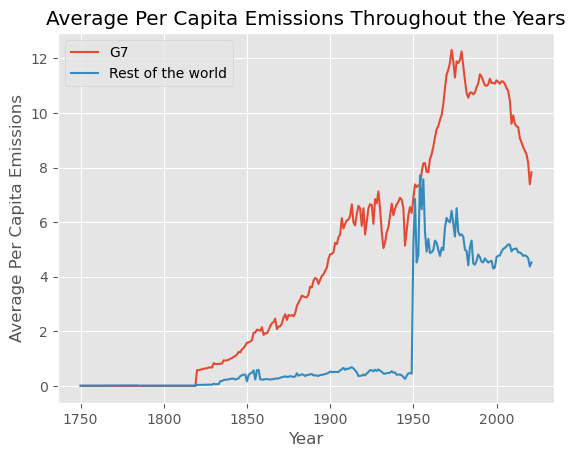

In [86]:
Emissions_data_clean = emissions_data_clean.set_index('Country')
g7_countries = ['USA', 'United Kingdom', 'Japan', 'Italy', 'France', 'Germany']
g7_data = Emissions_data_clean.loc[g7_countries]

rest_data = Emissions_data_clean.loc[~(Emissions_data_clean.index.isin(g7_countries))]
rest_data = rest_data.loc[~(rest_data.index == "International Transport")]
                            

g7_mean = g7_data.groupby('Year')['Per Capita'].mean()
rest_mean = rest_data.groupby('Year')['Per Capita'].mean()

plt.plot(g7_mean.index, g7_mean, label='G7')
plt.plot(rest_mean.index, rest_mean, label='Rest of the world')

plt.xlabel('Year')
plt.ylabel('Average Per Capita Emissions')
plt.legend()
plt.title('Average Per Capita Emissions Throughout the Years')
plt.show()

## 2.2 Maps and Interpretation

Below are two maps. The first showing the distribution of coal emissions and the second displaying average household size in the most recent year the data was collected.

The share of coal among total emissions is displayed, in order to better understand the relationship between carbon emissions and economic conditions. This was shown on the micro level in South Africa in Balmer's 2017 study of household coal use in urban South Africa (Balmer, M. (2017). Household coal use in an urban township in South Africa. Journal of Energy in Southern Africa, 18, 27-32.).

The second map is to display the average household size to see how it matches the previous coal emissions map. If we see a trend of countries that are both high in terms of carbon emissions and average household size, then it'll serve to reinforce Balmer's theory on a macro scale. Namely, bigger households burn more coal due to the need to generate more energy than what the state allots. On the other hand, the opposite relationship may be true as well where smaller households consume more, not because household size is directly correlated with emissions but rather because it is correlated with wealth and wealth is correlated with emissions. In further research this relationship will be refined through different empirical methods such as IV tests or a Diff and Diff analysis.

In [28]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("name")

world.head()

,pop_est,continent,iso_a3,gdp_md_est,geometry
name,,,,,
Fiji,889953.0,Oceania,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
Tanzania,58005463.0,Africa,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
W. Sahara,603253.0,Africa,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
Canada,37589262.0,North America,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
United States of America,328239523.0,North America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [29]:
emissions_data["ISO 3166-1 alpha-3"] = emissions_data["ISO 3166-1 alpha-3"].str.title()
emissions_data["ISO 3166-1 alpha-3"] = emissions_data["ISO 3166-1 alpha-3"].str.strip()
world["iso_a3"] = world["iso_a3"].str.title()
world["iso_a3"] = world["iso_a3"].str.strip()
country_emissions = world.merge(emissions_data, left_on="iso_a3", right_on="ISO 3166-1 alpha-3", how="inner")
country_emissions["Coal Share"] = country_emissions["Coal"] / (country_emissions["Total"])

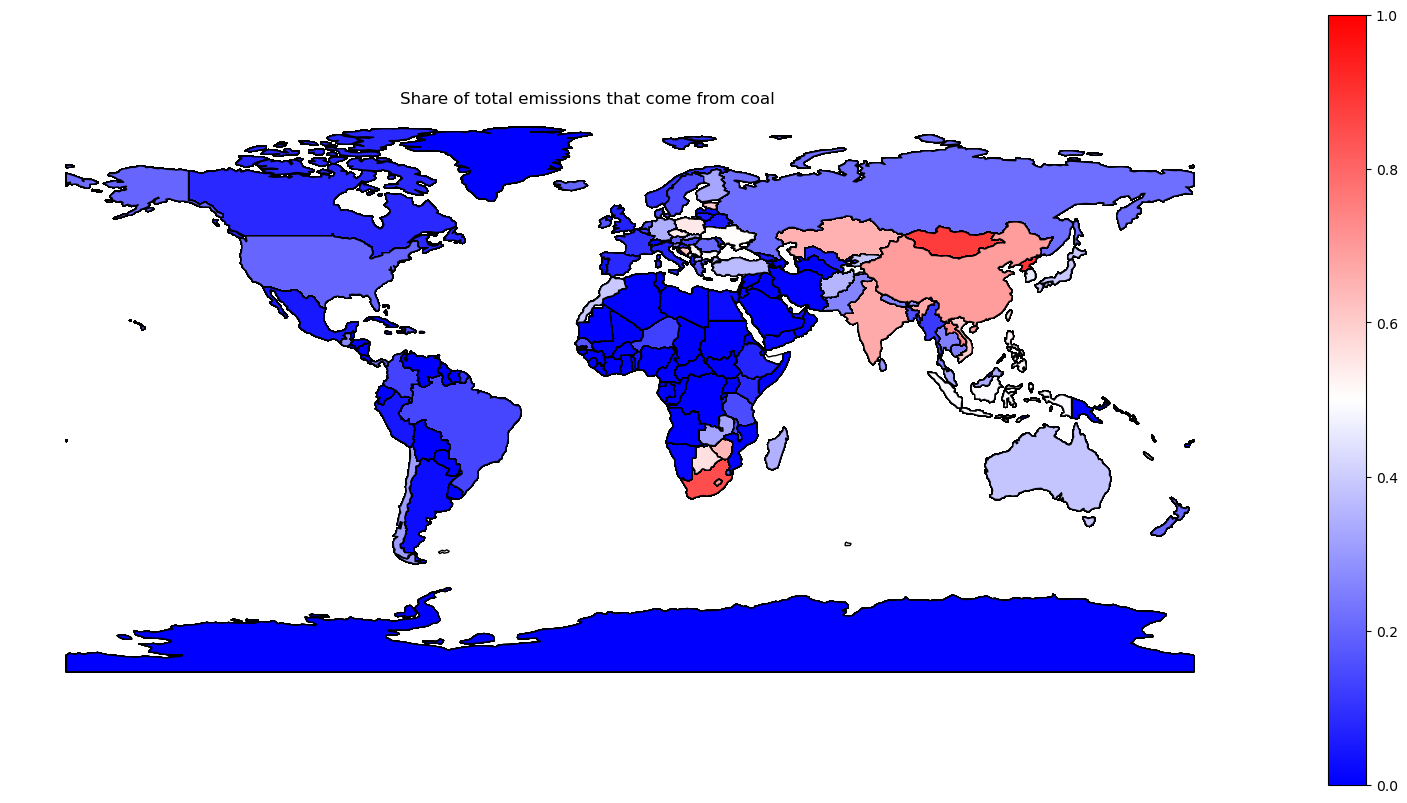

In [30]:
fig, gax = plt.subplots(figsize = (20,20))
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

world.plot(ax=gax, edgecolor='black',color='white')

country_emissions.plot(
    ax=gax, edgecolor='black', column='Coal Share', legend=True, cmap='bwr', legend_kwds={"shrink": 0.5},
    vmin=0, vmax=1 
)

gax.annotate('Share of total emissions that come from coal',xy=(0.2, 0.35),fontsize='large', xycoords='figure fraction')

plt.axis('off')

plt.show()

In [31]:
max_years = household_data.groupby(['Country'])['Year'].max()
max_years = max_years.to_frame().rename(columns= {'Year':'Max_Year'})

In [32]:
household_data = pd.merge(household_data,max_years, how = 'left', on='Country')

In [33]:
household_data_max_year = household_data[household_data.Year==household_data.Max_Year]

In [34]:
world_household = pd.merge(household_data_max_year, world, left_index=True, right_index=True)

ValueError: Unknown format code 'f' for object of type 'str'

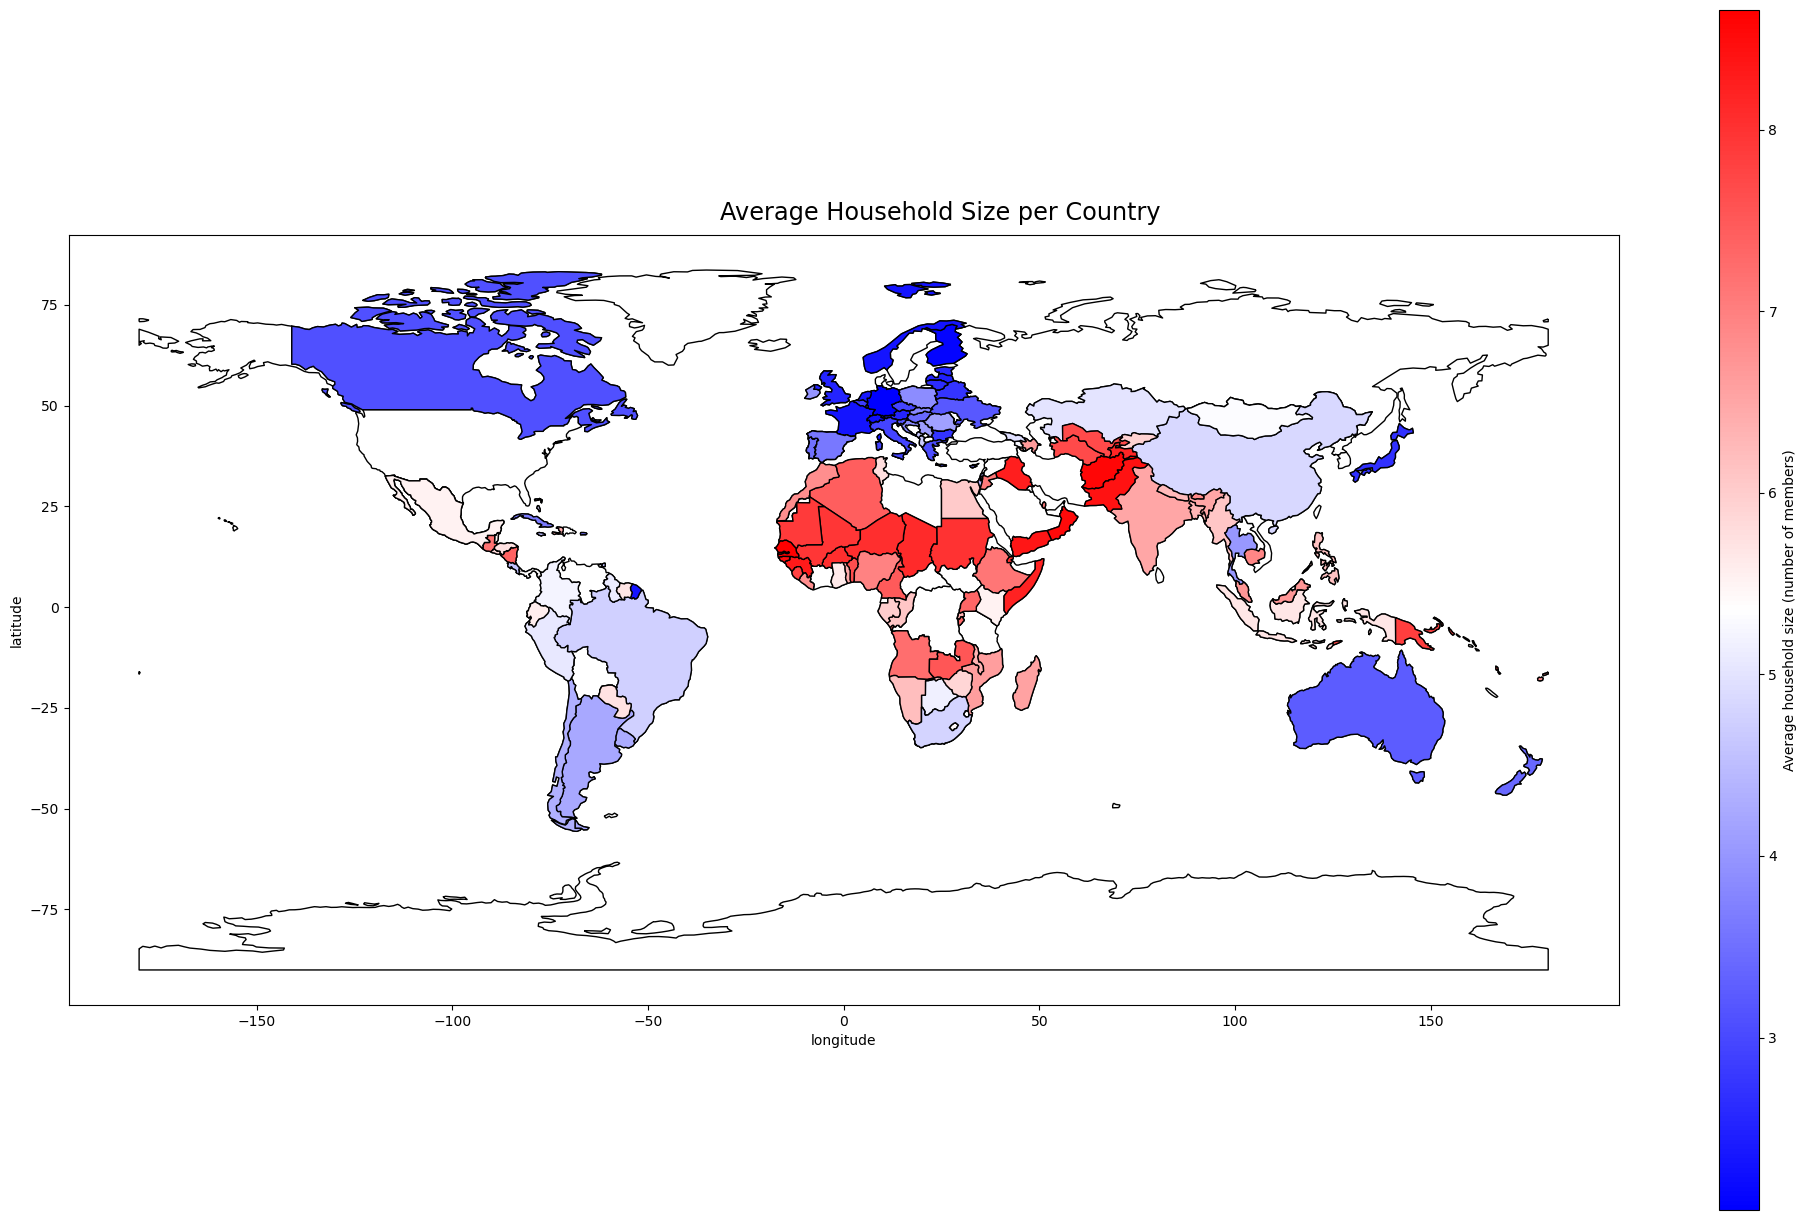

In [35]:
gdf = gpd.GeoDataFrame(world_household, geometry= "geometry")
fig, gax = plt.subplots(figsize = (20,20))
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

world.plot(ax=gax, edgecolor='black',color='white')

gdf.plot(
    ax=gax, edgecolor='black', column='Average household size (number of members)', cmap='bwr', legend=False)

fig = plt.gcf()
cax = fig.add_axes([0.95, 0.2, 0.02, 0.6]) # x, y, width, height
vmin = gdf['Average household size (number of members)'].min()
vmax = gdf['Average household size (number of members)'].max()
sm = plt.cm.ScalarMappable(cmap='bwr', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar=fig.colorbar(sm, cax=cax)
cbar.ax.set_ylabel('Average household size (number of members)')
gax.annotate('Average Household Size per Country',xy=(0.36, 0.5),fontsize='xx-large', xycoords='figure fraction')
warnings.filterwarnings("ignore")
cbar.ax.set_yticklabels(['{:.2f}'.format(vmin), '{:.2f}'.format(vmax)])
plt.axis('off')

plt.show()


# Project Three
## 3.1 Potential Data to Scrape
To investigate the impact of household size on carbon emissions and potentially build upon the Kellsworth-Krebs findings, I plan to incorporate floor area per capita data into my analysis. I will run a regression analysis that controls for both square footage per capita and GDP per capita, with the latter being easier to obtain through dataset or web scraping. This will allow me to isolate the effect of household size on carbon emissions.

However, obtaining comprehensive global floor area per capita data is a challenge. To address this, I will scrape information from the websites of various national agencies or real estate websites to gain a better understanding of the factors involved, including historical data.

In terms of merging, I will merge the floor area per capita data with the existing dataset that already includes household size and emissions. The merging will be based on year and country. I will eliminate any data that isn't represented in any of the three datasets to avoid any errors in the regression analysis. Given the large amount of data available, it is expected that the final dataset will contain more than the required 500 observations for a regression analysis.

## 3.2 Potential Challenges
Several potential challenges may arise with this scraping initiative, including the sheer number of websites that I would need to scrape from, as well as the different metrics and missing data that I may need to collect myself or obtain using satellite data.

The first issue is self-explanatory. Since there are approximately 200 countries, I would need to gather data from multiple governmental and national real estate websites. Moreover, much of this data is collected sparsely, making it difficult to obtain.

Measurement conversions will also need to be taken into account, particularly when dealing with the US in comparison to the rest of the world. This issue can be addressed by multiplying the US values by roughly 0.3 to convert them to the more global metric.

Lastly, availability may also pose a challenge. While many countries have data on population density, household size, and housing units, unit size or floor area per capita data may not be readily available. As such, original data collection may need to be done through surveys of residents or construction firms, or rough estimates may need to be made by examining satellite data and population density in a particular region.


## 3.3 Scraping the Data
Instead of embarking on the gargantuan task of collecting enough floor are per capita that would suffice to find a robust relationship i'll scrape GDP per Capita data off of Wikipedia and then add a population density dataset to the dataframe. 

We'll be using the IMF data from this link ("https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_GDP_(nominal)_per_capita") which corresponds to the first four tables on the site. This will gives us each nations gdp per capita for every year from 1980-2019.

In [36]:
URL = 'https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_GDP_(nominal)_per_capita'

# Connect to the URL
Response = requests.get(URL) 

# Parse HTML and save to BeautifulSoup object¶
largest_soup = BeautifulSoup(Response.text, "html.parser") #html.parser telling Beautiful Soup that it's an HTML file

In [37]:
# Here we will be trying to find the tables in the HTML file by finding the first table classified as "wikitable"
# Using IMF data, so need to take only the first four tables, as opposed to all of the tables on the site
Table_8089 = largest_soup.find_all('table', {'class': 'wikitable'})[0]
header_row = Table_8089.find('tr')
columns = [col.get_text(strip=True) for col in header_row.find_all('th')]

In [38]:
# Here we're finding all the rows in the first table and for each row we're populating the column with 'td' 
# which is the content in each row
rows = Table_8089.find_all('tr')[1:]
data = []
for row in rows:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)

df_8089 = pd.DataFrame(data, columns=columns)

In [39]:
# Given we have 4 IMF tables we're trying to merge we're doing this process again, this time it's for the years 1990-1999
Table_9099 = largest_soup.find_all('table', {'class': 'wikitable'})[1]
header_row = Table_9099.find('tr')
columns = [col.get_text(strip=True) for col in header_row.find_all('th')]

rows = Table_9099.find_all('tr')[1:]
data = []
for row in rows:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)

df_9099 = pd.DataFrame(data, columns=columns)


In [40]:
# Now for 2000-2009
Table_0009 = largest_soup.find_all('table', {'class': 'wikitable'})[2]
header_row = Table_0009.find('tr')
columns = [col.get_text(strip=True) for col in header_row.find_all('th')]

rows = Table_0009.find_all('tr')[1:]
data = []
for row in rows:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)

df_0009 = pd.DataFrame(data, columns=columns)

In [41]:
# Finally for 2009-2019, note that we're creating different dataframes for the different IMF tables on the site
Table_1019 = largest_soup.find_all('table', {'class': 'wikitable'})[3]
header_row = Table_1019.find('tr')
columns = [col.get_text(strip=True) for col in header_row.find_all('th')]

rows = Table_1019.find_all('tr')[1:]
data = []
for row in rows:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)

df_1019 = pd.DataFrame(data, columns=columns)

In [42]:
# Now we'll merge all the dataframes

Merged_df = pd.merge(df_8089, df_9099, on= "Country (or dependent territory)")
Merged_df = pd.merge(Merged_df, df_0009, on= "Country (or dependent territory)")
Merged_df = pd.merge(Merged_df, df_1019, on= "Country (or dependent territory)")

Merged_df = Merged_df.rename(columns = {"Country (or dependent territory)": "Country"})
Merged_df = Merged_df.set_index("Country")
Merged_df.rename(index={'United States': 'USA'}, inplace=True)
Merged_df = Merged_df.reset_index(drop=False)

## 3.4 Merging 
First I will merge the data with the original, cleaned emissions dataset, then will merge with the dataset containing household size as well. 

Given the merged dataframe has the years as the columns instead of column values we'll use pd.melt to create a new "Year" column containing the different years they collected the data for.

In [43]:
melted_df = pd.melt(Merged_df, id_vars=['Country'], var_name='Year', value_name='GDP Per Capita')
melted_df['Year'] = melted_df['Year'].astype('int64')
melted_df

,Country,Year,GDP Per Capita
0,Afghanistan,1980,—
1,Albania,1980,728
2,Algeria,1980,"2,269"
3,Andorra,1980,—
4,Angola,1980,745
...,...,...,...
7835,Vietnam,2019,"3,398"
7836,Palestine,2019,"3,443"
7837,Yemen,2019,740
7838,Zambia,2019,"1,272"


In [44]:
emerged_df = pd.merge(emissions_data_clean, melted_df, on=['Country', 'Year'])
emerged_df = emerged_df[emerged_df['GDP Per Capita'] != "—"]

emerged_df

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,GDP Per Capita
22,Afghanistan,AFG,2002,1.340995,0.055109,0.727438,0.547416,0.011033,0.0,0.0,0.063856,233
23,Afghanistan,AFG,2003,1.559602,0.091813,0.991575,0.466408,0.009807,0.0,0.0,0.068871,234
24,Afghanistan,AFG,2004,1.237247,0.091600,0.908672,0.227168,0.009807,0.0,0.0,0.052529,254
25,Afghanistan,AFG,2005,1.889507,0.106256,1.447280,0.329760,0.006211,0.0,0.0,0.077403,294
26,Afghanistan,AFG,2006,2.159318,0.160944,1.656993,0.329204,0.012177,0.0,0.0,0.084869,321
...,...,...,...,...,...,...,...,...,...,...,...,...
7265,Zimbabwe,ZWE,2015,12.254954,8.060800,3.609040,0.000000,0.585114,0.0,0.0,0.865772,"1,425"
7266,Zimbabwe,ZWE,2016,10.533453,6.932288,3.140048,0.000000,0.461117,0.0,0.0,0.728822,"1,445"
7267,Zimbabwe,ZWE,2017,9.596071,5.900452,3.226752,0.000000,0.468867,0.0,0.0,0.650533,"1,481"
7268,Zimbabwe,ZWE,2018,11.795478,7.177776,4.059712,0.000000,0.557990,0.0,0.0,0.783639,"2,523"


Note: Although we removed null values, in order to make our tables clearer, we still have 6602 observations. Also note that the GDP per capita is in USD.

## 3.5 Visualizations

In the following we'll create a stacked bar chart to explore whether there have been recent changes in the composition of total emissions based on the GDP per capita of the nation emitting. Then we'll create a hexbin graph to uncover whether there's any potential relationship between GDP per capita and Per capita emissions.

The former will represent a refining of previous data, using G7 status as a proxy for wealth. It'll also provide a representation of how the composition of total emissions has been changing, according to the wealth of the nation. The bin sizes were chosen to correspond with the relative size of the G7.

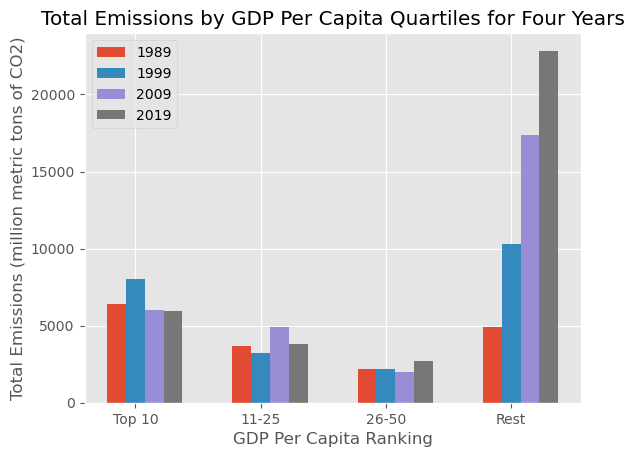

In [88]:
years = [1989, 1999, 2009, 2019]
y1989 = emerged_df[emerged_df['Year']==1989].sort_values(by = ['GDP Per Capita'], ascending = [False])
y1999 = emerged_df[emerged_df['Year']==1999].sort_values(by = ['GDP Per Capita'], ascending = [False])
y2009 = emerged_df[emerged_df['Year']==2009].sort_values(by = ['GDP Per Capita'], ascending = [False])
y2019 = emerged_df[emerged_df['Year']==2019].sort_values(by = ['GDP Per Capita'], ascending = [False])
                         
top_10_89= y1989[:10]
top_10_99= y1999[:10]
top_10_09= y2009[:10]
top_10_19= y2019[:10]

top_1025 = y1989[10:25]
top_1025_99 = y1999[10:25]
top_1025_09 = y2009[10:25]
top_1025_19 = y2019[10:25]

top_2550 = y1989[25:50]
top_2550_99 = y1999[25:50]
top_2550_09 = y2009[25:50]
top_2550_19 = y2019[25:50]

rest_89 = y1989[50:]
rest_99 = y1999[50:]
rest_09 = y2009[50:]
rest_19 = y2019[50:]

# Create data for stacked bars
emissions_89 = [sum(top_10_89['Total']), sum(top_1025['Total']), sum(top_2550['Total']), sum(rest_89['Total'])]
emissions_99 = [sum(top_10_99['Total']), sum(top_1025_99['Total']), sum(top_2550_99['Total']), sum(rest_99['Total'])]
emissions_09 = [sum(top_10_09['Total']), sum(top_1025_09['Total']), sum(top_2550_09['Total']), sum(rest_09['Total'])]
emissions_19 = [sum(top_10_19['Total']), sum(top_1025_19['Total']), sum(top_2550_19['Total']), sum(rest_19['Total'])]

# Create labels for the x-axis and each stack
labels = ['Top 10', '11-25', '26-50', 'Rest']

# Set up the figure and axes
fig, ax = plt.subplots()

# Set up the positions and width of each bar
bar_positions = np.arange(len(labels))
bar_width = 0.15

# Create the stacked bars for each year
ax.bar(bar_positions - bar_width, emissions_89, bar_width, label='1989')
ax.bar(bar_positions, emissions_99, bar_width, label='1999')
ax.bar(bar_positions + bar_width, emissions_09, bar_width, label='2009')
ax.bar(bar_positions + 2*bar_width, emissions_19, bar_width, label='2019')

# Add labels and title
ax.set_xlabel('GDP Per Capita Ranking')
ax.set_ylabel('Total Emissions (million metric tons of CO2)')
ax.set_title('Total Emissions by GDP Per Capita Quartiles for Four Years')
ax.set_xticks(bar_positions)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.show()


It appears that the inequality of emissions discussed earlier is currently decreasing, as poorer countries contribute more to the total emissions. This trend aligns with Schipper, Ting et al.'s 1997 study, which explored the decrease in energy use per capita in developed nations (Schipper, L., Ting, M., Khrushch, M., Unander, F., Monahan, P.A., & Golove, W. (1996)). The evolution of carbon dioxide emissions from energy use in industrialized countries: an end-use analysis). This trend continued well into the 90s, despite increased growth in GDP. The reasons for this trend include the ability of industrialized nations to transition more easily into renewable energy source development, as well as growing consciousness around the issue.

Nevertheless, this may also be due to other unrelated factors, such as the rise in per capita wealth of micro-states, both in europe (such as Lichtenstein, Monaco, Luxembourg) as well as in Asia (Qatar, UAE, Bahrain) that although very wealthy, have low total emissions because of their size.

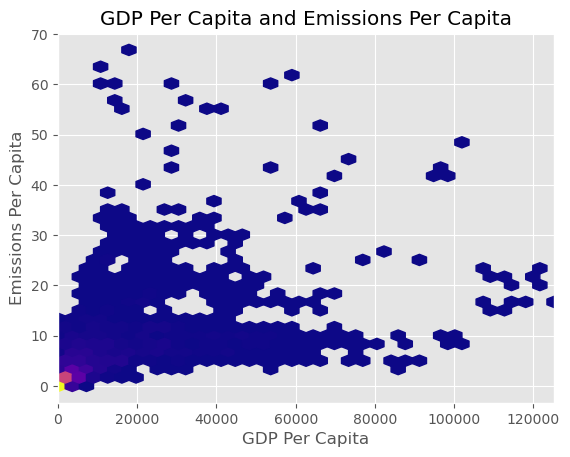

In [84]:
emerged_df.dropna(inplace=True)
emerged_df = emerged_df.replace(',', '', regex=True)
emerged_df['GDP Per Capita'] = emerged_df['GDP Per Capita'].astype('int64')

x = emerged_df['GDP Per Capita']
y = emerged_df['Per Capita']
xmin = 0
xmax= x.max()

fig, ax = plt.subplots()
plt.hexbin(x, y, gridsize=35, cmap="plasma", mincnt = 1)
ax.set_xlim(xmin, xmax)
# Set axis labels and title
ax.set_xlabel('GDP Per Capita')
ax.set_ylabel('Emissions Per Capita')
ax.set_title('GDP Per Capita and Emissions Per Capita')

plt.show()

The hexbin plot above shows that the relationship between GDP per capita and emissions per capita is not very clear. A cluster of countries with low GDP and low emissions is visible in the lower left corner of the plot. As we move along the GDP per capita axis, we notice a significant increase in carbon emissions from the $20,000 to $70,000 range, followed by a steady decrease in per capita emissions afterwards. One possible explanation for this is that, in the earlier years when the data was being collected (in the 1980s and 1990s), nations were less energy efficient. Therefore, since the chart captures data from multiple years, the relationship between GDP per capita and per capita emissions may be blurred.

To explore this further, we created a similar graph for a single year and observed a similar relationship between GDP per capita and emissions per capita. However, the numbers were small enough for the relationship to be considered noise and not statistically significant. These charts serve mainly to illustrate the main message that GDP per capita has *some* effect on emissions per capita, but further statistical analysis is required to establish the magnitude of the effect, which will be performed in this report.

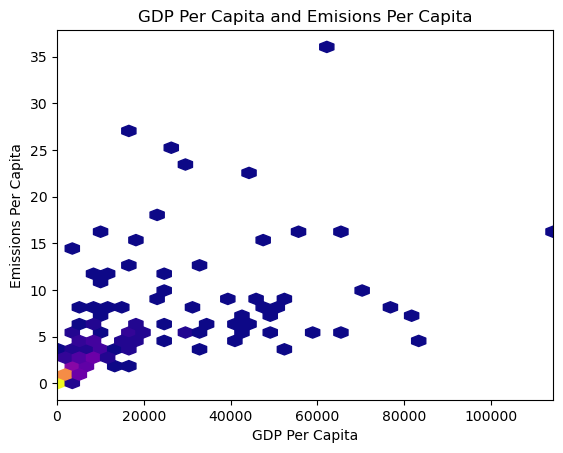

In [47]:
emerged_df.dropna(inplace=True)
emerged_df = emerged_df.replace(',', '', regex=True)
df_2019 = emerged_df[emerged_df['Year'] == 2019]


x = df_2019['GDP Per Capita']
y = df_2019['Per Capita']
xmin = 0
xmax= x.max()

fig, ax = plt.subplots()
plt.hexbin(x, y, gridsize=35, cmap="plasma", mincnt = 1)
ax.set_xlim(xmin, xmax)
# Set axis labels and title
ax.set_xlabel('GDP Per Capita')
ax.set_ylabel('Emissions Per Capita')
ax.set_title('GDP Per Capita and Emisions Per Capita')

plt.show()

## 3.6 Adding another Dataset

Given our study's objective of determining whether a significant relationship exists between household size and carbon emissions, it's essential to introduce population density data in our regression analysis to control for its effects. This will enable us to isolate the effect of household size on carbon emissions and determine whether it's a significant factor or whether household size is serving as a proxy for other variables such as GDP per capita and/or density.

It's important to note that density is distinct from household size as it doesn't capture the housing unit situation or actual living conditions in a country. For instance, a country like Algeria may have a low population density due to the desert nature of its landscape, but may have a high household size due to dense living in arable land. Therefore, controlling for density in our analysis is critical to accurately assess the impact of household size on carbon emissions.

In [48]:
# We're going to data scrape again, as it's easier than going through the UN's very thorough datasets

URL = 'https://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population_density'

# Connect to the URL
Response = requests.get(URL) 

# Parse HTML and save to BeautifulSoup object¶
largest_soup = BeautifulSoup(Response.text, "html.parser") #html.parser telling Beautiful Soup that it's an HTML file

data_Table = largest_soup.find_all('table', {'class': 'wikitable'})[0]
header_row = data_Table.find('tr')
columns = [col.get_text(strip=True) for col in header_row.find_all('th')]

rows = data_Table.find_all('tr')[1:]
data = []
for row in rows:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)

pop_den = pd.DataFrame(data, columns=columns)
pop_den.rename(columns = {'Country (or area)': 'Country'}, inplace = True)
pop_den['Country'] = pop_den['Country'].str.replace('*', '')

pop_den

,Country,1950,1960,1970,1980,1990,2000,2010,2018
0,Afghanistan,11.9,13.8,17.0,20.3,18.8,30.8,44.1,55.7
1,Albania,46.1,59.7,78.5,97.9,119.8,113.9,107.3,107.1
2,Algeria,3.7,4.7,6.1,8.1,10.9,13.1,15.2,17.6
3,American Samoa (USA),94.7,100.1,136.5,162.3,235.2,287.6,278.2,278.4
4,Andorra,13.2,28.5,51.7,76.7,116.0,139.1,179.7,163.7
...,...,...,...,...,...,...,...,...,...
227,Wallis and Futuna (France),50.0,61.1,63.2,80.2,99.1,103.6,95.9,83.4
228,Western Sahara [7],0.1,0.1,0.3,0.6,0.8,1.2,1.8,2.1
229,Yemen,8.3,9.8,11.7,15.4,22.8,33.9,44.7,54.8
230,Zambia,3.1,4.1,5.6,7.9,10.8,14.2,18.6,23.7


In [49]:
Melted_df = pd.melt(pop_den, id_vars=['Country'], var_name='Year', value_name='Population Density')
Melted_df['Year'] = Melted_df['Year'].astype('int64')
Melted_df['Country']= Melted_df['Country'].astype('str')
Melted_df['Country']= Melted_df['Country'].str.strip()
Emerged_df = pd.merge(emerged_df, Melted_df, on=['Country', 'Year']) #creating dataset with all categories
Emerged_df = Emerged_df.replace(',', '', regex=True)


In [50]:
Emerged_df

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,GDP Per Capita,Population Density
0,Afghanistan,AFG,2010,8.364803,2.246032,5.833088,0.271136,0.014547,0.0,0.0,0.296733,631,44.1
1,Afghanistan,AFG,2018,10.818048,3.847200,6.620848,0.293120,0.056880,0.0,0.0,0.294876,582,55.7
2,Albania,ALB,1980,5.170837,2.322976,1.571856,0.773104,0.502901,0.0,0.0,1.757801,728,97.9
3,Albania,ALB,1990,5.520602,2.498848,2.172752,0.465328,0.383674,0.0,0.0,1.675415,676,119.8
4,Albania,ALB,2000,3.024926,0.069531,2.839801,0.021957,0.093637,0.0,0.0,0.950630,1128,113.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Zambia,ZMB,2018,7.412041,2.744336,3.601712,0.000000,1.065993,0.0,0.0,0.415569,1480,23.7
773,Zimbabwe,ZWE,1990,15.551593,13.417568,1.846656,0.000000,0.287369,0.0,0.0,1.537647,1037,26.3
774,Zimbabwe,ZWE,2000,13.818202,10.123632,3.290272,0.000000,0.404298,0.0,0.0,1.167603,970,31.6
775,Zimbabwe,ZWE,2010,8.754012,6.507264,1.938256,0.000000,0.308492,0.0,0.0,0.681789,976,36.4


In [51]:
# Preparation
X = Emerged_df['Population Density'].values.reshape(-1,1)
X = X.astype('float64')
y = Emerged_df['Per Capita'].values

In [53]:
# Train
ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

In [54]:
# Evaluate 
r2 = model.score(X, y)

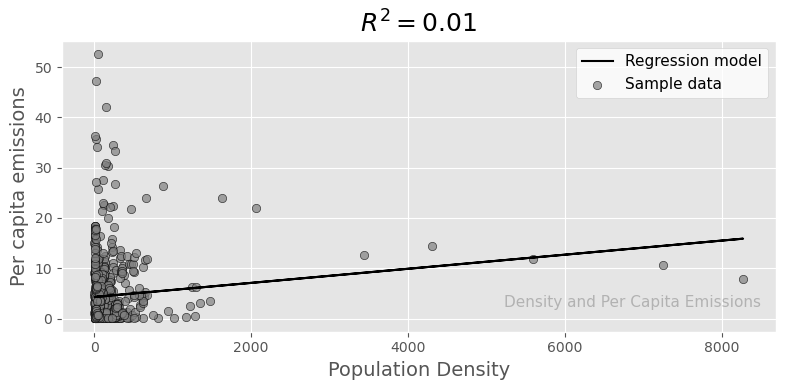

In [55]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Per capita emissions', fontsize=14)
ax.set_xlabel('Population Density', fontsize=14)
ax.text(0.8, 0.1, 'Density and Per Capita Emissions', fontsize=11, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)


fig.tight_layout()

Despite the presence of outliers that contribute to noisy results, the relationship between population density and per capita emissions only shows a Rsquared value of 0.01, indicating a weak correlation between the two variables' variances. This finding is surprising as one would assume that higher population density would result in more efficient resource use. One reason behind this weak relationship could be the different characteristics population density is picking up. It could be picking up a poorer country, with high fertility rates and low per capita emissions, or a highly urbanized state with high per capita emissions. Density itself depending on the place may have a positive or negative effect on emissions. As we'll see in Yonghong Liu's study, densification was linked with higher emissions, but in a North American situation, when standing opposed to subarbinazation, dense urbanization is actually more energy efficient (https://suburbs.info.yorku.ca/2014/02/suburbanization-and-density-a-few-critical-notes/).

To better understand the relationship between household size, GDP per capita, population density and per capita emissions we have included a correlation table in this stage of the paper. By controlling for other variables that may impact household size and carbon emissions, we hope to examine the effect of household size on emissions more effectively. Furthermore, this correlation matrix lays the groundwork for the upcoming multivariate regression analysis.

In [82]:
EMERGED_df = pd.merge(Emerged_df, household_data, on=['Country', 'Year'])

EMERGED_df= EMERGED_df.replace(',', '', regex=True)


EMERGED_df['GDP Per Capita'] = EMERGED_df['GDP Per Capita'].astype('float')
EMERGED_df['Population Density'] = EMERGED_df['Population Density'].astype('float')
EMERGED_df['Average household size (number of members)'] = EMERGED_df['Average household size (number of members)'].astype('float')

EMERGED_df.rename(columns={'Per Capita': 'Per Capita Emissions'}, inplace=True)
EMERGED_df

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita Emissions,GDP Per Capita,Population Density,Reference date (dd/mm/yyyy),Average household size (number of members),Max_Year
0,Afghanistan,AFG,2010,8.364803,2.246032,5.833088,0.271136,0.014547,0.000000,0.0,0.296733,631.0,44.1,2010-01-07,7.75,2015
1,Albania,ALB,2000,3.024926,0.069531,2.839801,0.021957,0.093637,0.000000,0.0,0.950630,1128.0,113.9,2000-01-07,4.35,2017
2,Algeria,DZA,2018,173.911594,1.330002,54.922121,88.886635,12.381661,16.391175,0.0,4.147961,4119.0,17.6,2018-01-07,4.94,2018
3,Argentina,ARG,1980,108.656928,2.865248,76.507984,19.565760,3.562416,6.155520,0.0,3.877170,8361.0,10.3,1980-01-07,3.86,2019
4,Argentina,ARG,2010,186.733136,3.990096,90.145392,86.928400,4.178000,1.491248,0.0,4.543372,10413.0,15.1,2010-01-07,3.26,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Zambia,ZMB,1990,2.407113,0.831728,1.395984,0.000000,0.179401,0.000000,0.0,0.313165,510.0,10.8,1990-01-07,5.85,2018
147,Zambia,ZMB,2000,1.784113,0.289456,1.341024,0.000000,0.153633,0.000000,0.0,0.180375,340.0,14.2,2000-01-07,5.24,2018
148,Zambia,ZMB,2010,3.120300,0.381056,2.304656,0.000000,0.434588,0.000000,0.0,0.226238,1456.0,18.6,2010-01-07,5.21,2018
149,Zambia,ZMB,2018,7.412041,2.744336,3.601712,0.000000,1.065993,0.000000,0.0,0.415569,1480.0,23.7,2018-01-08,5.00,2018


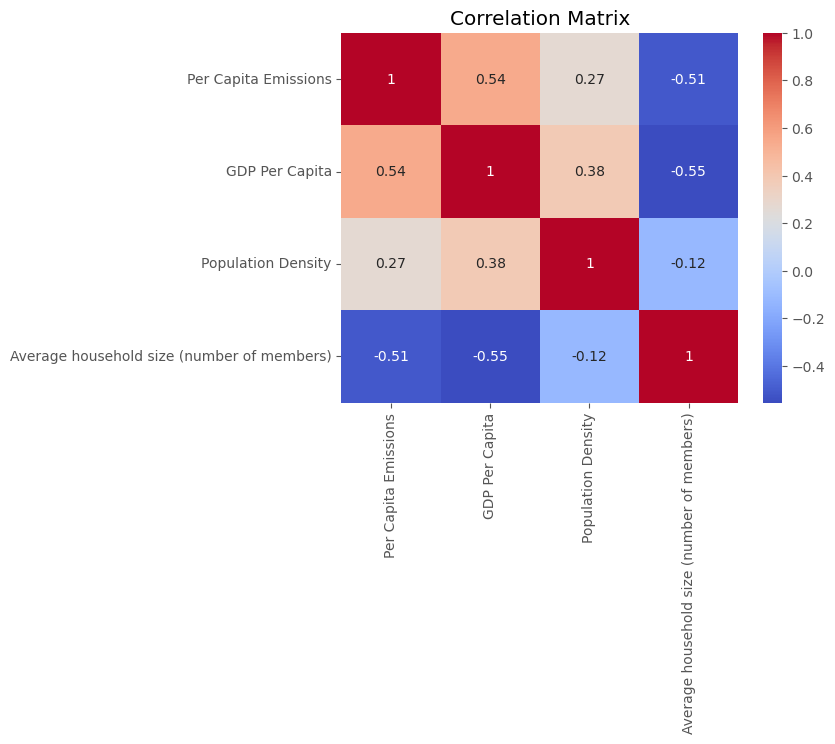

In [83]:
cols = ['Per Capita Emissions','GDP Per Capita', 'Population Density', 'Average household size (number of members)']


corr = EMERGED_df[cols].corr()  # calculate correlation matrix

# plot the correlation matrix as a heatmap
sn.heatmap(corr, cmap='coolwarm', annot=True)

# set plot title
plt.title('Correlation Matrix')

# display the plot
plt.show()

Population's purported link to carbon emissions may be due, in part, to its weak correlation with GDP per capita and the subsequent moderate effect GDP per capita has on per capita emissions. Because of this study’s a global scope, it does not directly contradict Yonghong Liu's 2017 paper ("The impact of urbanization on GHG emissions in China: The role of population density," Journal of Cleaner Production 157 (2017): 299-309), which found that density played a significant role in increasing China's carbon emissions. However, it challenges the possible assumption that this conclusion could be extrapolated and considered universal.

Another intriguing finding is the negative correlation between average household size and population density. One might expect that less space/more density would result in more people living in each housing unit, but the relationship may not be statistically significant once a regression is run. Nevertheless, it is noteworthy that there is no positive relationship between the two. One possible explanation is the pattern of high-density urbanization in developed countries, where smaller households are more common due to cultural reasons, as singles and couples live without members of their extended family. Future editions of this paper will explore this issue in greater depth.


## Conclusion and Next Steps
This paper builds upon the original previous research by incorporating the new United Nations Data (United Nations, Department of Economic and Social Affairs, Population Division (2022).Database on Household Size and Composition 2022. UN DESA/POP/2022/DC/NO. 8.) and testing for the relationship between household size and per capita emissions. The scatter plot at the beginning illustrated a slight negative relationship between household size and per capita emissions in the 2-4 person range, without taking fixed effects or endogeneity into account.

The presented maps showcased the distribution of both household sizes and coal emissions. The inclusion of coal emissions allowed for further exploration of Balmer's 2017 South Africa study and the identification of potential macro-level implications of the observed relationship between low-income, large household sizes, and high coal usage.

We also added data GDP per Capita data from the IMF (https://www.imf.org/en/Publications/WEO/weo-database/2022/October) as well as population density data from the UN (https://www.un-ilibrary.org/content/books/9789210001014), both scrapped from Wikipedia for logistical reasons. Both were included to rule out confounding bias, as household size may be strongly linked with these two other variables. 

By using actual GDP per capita instead of G7 status to proxy for wealth, this edition was able to establish a more robust relationship between wealth, per capita emissions, and other variables. Our analysis of total emissions by rank in per capita emissions showed that wealthier nations are actually decreasing their overall contributions to total emissions relative to the rest of the world, suggesting that other factors may be important in the production of carbon emissions. We also examined the relationship between population density and carbon emissions through a linear regression and found a low R-squared, indicating a weak link between these two variables.

Finally, we created a correlation table to lay the groundwork for future multivariate regression analysis and found that household size and GDP per capita had the strongest effects on emissions. However, these variables are negatively correlated, which underscores the need for further analysis.

As mentioned before, further research should include a multivariate regression analysis to determine the statistical significance of each explanatory variable's effect on emissions per capita, while controlling for the other variables. In addition, exploration of the relationship between household size and density is recommended because of the conclusions that run counter to common assumptions and Yonghon Liu's 2017 paper. A qualitative study of why household size may also be required in order to offer more concrete suggestions to governments and urban planning organizations.